# Proyek Analisis Data : [Bike Sharing Dataset]
- Nama : Rival Moh. Wahyudi
- Email : vallllwhy@students.unnes.ac.id
- ID Dicoding : Rival Moh. Wahyudi

# Pertanyaan Bisnis
1. demografi dari penyewa apakah telah registrasi atau tidak (pengguna umum)?
2. banyak penyewa pada beberapa bulan terakhir dalam satu tahun?
3. pada musim apa banyak penyewa menyewa sepeda?
4. pada kondisi cuaca berkorelasi dengan jumlah penyewa sepeda dan kelas kondisi cuaca seperti apa yang menghasilkan banyak penyewa sepeda?

# Import Library

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import statsmodels.api as sm
from statsmodels.formula.api import ols  

#Data Wrangling

In [166]:
#mengekstrak data zip yang telah diunduh
shutil.unpack_archive('archive(2).zip', 'bike_rental')

In [167]:
#memuat tabel rental sepeda pada rentang jam dan harian

hour_df = pd.read_csv('bike_rental/hour.csv')
day_df = pd.read_csv('bike_rental/day.csv')

In [168]:
#sample dari dataframe hour_df
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10396,10397,2012-03-14,1,1,3,7,0,3,1,1,0.44,0.4394,0.82,0.1045,20,348,368
4382,4383,2011-07-06,3,0,7,12,0,3,1,2,0.74,0.6970,0.66,0.0896,38,114,152
1151,1152,2011-02-20,1,0,2,18,0,0,0,2,0.34,0.3333,0.36,0.1343,30,71,101
1652,1653,2011-03-14,1,0,3,10,0,1,1,1,0.34,0.3182,0.42,0.2537,27,57,84
15827,15828,2012-10-26,4,1,10,16,0,5,1,2,0.58,0.5455,0.73,0.1642,137,445,582


In [169]:
#sample dari dataframe day_df
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
111,112,2011-04-22,2,0,4,0,5,1,2,0.336667,0.321954,0.729583,0.219521,177,1506,1683
161,162,2011-06-11,2,0,6,0,6,0,1,0.725000,0.678038,0.654583,0.154850,1729,3237,4966
157,158,2011-06-07,2,0,6,0,2,1,1,0.707500,0.655950,0.597917,0.187808,763,4070,4833
646,647,2012-10-08,4,1,10,1,1,0,2,0.383333,0.387608,0.709583,0.189679,874,4604,5478
617,618,2012-09-09,3,1,9,0,0,0,1,0.610000,0.578925,0.547500,0.224496,2570,5657,8227


Deskripsi data
- index = urutan dari data diambil
- dteday = tanggal
- season = musim (1:semi, 2:panas, 3:gugur, 4:dingin)
- yr = tahun (0:2011, 1:2012)
- month = bulan (1 sampai 12)
- hr : jam (0 sampai 23)
- holiday = hari libur atau bukan
- weekday = hari dalam seminggu (0 sampai 6)
- workingday = hari kerja yang ditandai dengan value 1 selain hari kerja seperti weekend dan hiliday ditandai dengan 0
- weathersit = konidsi cuaca pada saat itu
    - 1: cerah, sedikit berawan, sebagian berawan
    - 2: berawan, sangat berawan, mendung, berkabut
    - 3: bersalju ringan, hujan ringan, petir, awan gelap.
    - 4: hujan lebat, salju ynang sangat menumpuk, petir dengan kabut, badai salju
- temp = normalisasi suhu sekitar, dibagi dengna 41
- atemp = normalisasi suhu yang diukur berdasarakan seberapa dingin atau panas di lingkungan terhadap kulit, dibagi dengan 50.
- hum = normalisasi tingkat kelembapan, dibagi dengan 100.
- windspeed = kecepatan angin yang sudah dinormalisasi dengan dibagi dengan angka 67.
- casual = banyak pengguna casual --> pengguna biasa tidak teregistrasi
- registered = banyak pengguna yang meminjam dan teregistrasi.
- cnt = total dari peminjam umum dan teregistrasi

In [170]:
# melihat apa saja atribut dari dataframe hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [171]:
#melihat atribut dari dataframe day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


terlihat dari info dataframe day_df maupun hour_df tidak value yang kosong atau tidak terisi

In [172]:
#dapat diketahui juga dengan menggunakan fungsi berikut apakah ada yang kosong

print (f"day_df dataframe : {day_df.isna().sum()}")
print (f"hour_df dataframe : {hour_df.isna().sum()}")

day_df dataframe : instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
hour_df dataframe : instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [173]:
#memeriksa apakah ada data duplicated pada dataframe

print (f"day_df dataframe : {day_df.duplicated().sum()}")
print (f"hour_df dataframe : {hour_df.duplicated().sum()}")

day_df dataframe : 0
hour_df dataframe : 0


In [174]:
#menampilkan deskripsi dari dataframe day_df
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [175]:
'''pada data day_df maupun hour_df memiliki masalah yaitu kesalahan format pada variabel dteday yang seharusnya memiliki 
format datetime pada langkah ini akan diubah format ke datetime'''

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [176]:
#deskripsi dari data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [177]:
# deskripsi pada data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#Explanatory Data

Melakukan uji korelasi pada variable season dan weathersit apakah berpengaruh pada kenaikan peminjma sepeda

In [178]:
''' disini kita akan melakukan uji korelasi pada variable weathersit dan season dengan variable cnt yang dimana kondisi cuaca di bagi 
menjadi 4 kelas dari kelas 1 sampai 4 begitu juga dengan season apakh berpedangaruh dengan jumlah penyewa sepeda'''
'''metode korelasi yang digunakan adalah anova kita akan menggunakan statmodels '''

# anova
model = ols('cnt ~ C(season) + C(weathersit) + C(season):C(weathersit)', data=day_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print (anova_table)


                               sum_sq     df           F        PR(>F)
C(season)                9.224636e+08    3.0  145.951415  7.347364e-74
C(weathersit)            2.435123e+08    2.0   57.792465  5.313463e-24
C(season):C(weathersit)  3.065076e+07    6.0    2.424769  2.505746e-02
Residual                 1.514776e+09  719.0         NaN           NaN


In [179]:
'''Kesimpulan : - C(season) menujukkan korelasi antara variable season dengan jumlah penyewa sepeda dari hasil diatas F-statistics mempunyai hasil
                yang sangat tinggi yaitu 145.951...  dan p-value(PR(>F)) kurang dari 0.05 atau mendekati 0 karena hasil diatas sangat kecil mendekati 0
                menyimpulkan bahwa variable season memiliki korelasi dan sangat mempengaruhi jumlah penyewa
                - C(weathersit) menunjukkan korelasi antara variable weathersit dengan jumlah penyewa sepeda dari hasil diatas F-statistics mempunyai hasil
                yang lumayan tinggi yaitu 57.792... dan p-value(PR(>F)) kurang dari 0.05 atau mendekati 0 menyimpukan bahwa variable weathersit juga mempengaruhi
                jumlah penyewa sepeda
                - hubugnan antara season dan weathersit terhadap jumlah penyewa signifikan atau berpengaruh pada jumlah penyewa tetapi lebih kecil daripada
                dengan hubungan season dengan jumlah penyewa yang dapat disimpulkan effect dari weathersit terhadap jumlah pengunjung akan berubha tergantung dengan variabel season.'''

'Kesimpulan : - C(season) menujukkan korelasi antara variable season dengan jumlah penyewa sepeda dari hasil diatas F-statistics mempunyai hasil\n                yang sangat tinggi yaitu 145.951...  dan p-value(PR(>F)) kurang dari 0.05 atau mendekati 0 karena hasil diatas sangat kecil mendekati 0\n                menyimpulkan bahwa variable season memiliki korelasi dan sangat mempengaruhi jumlah penyewa\n                - C(weathersit) menunjukkan korelasi antara variable weathersit dengan jumlah penyewa sepeda dari hasil diatas F-statistics mempunyai hasil\n                yang lumayan tinggi yaitu 57.792... dan p-value(PR(>F)) kurang dari 0.05 atau mendekati 0 menyimpukan bahwa variable weathersit juga mempengaruhi\n                jumlah penyewa sepeda\n                - hubugnan antara season dan weathersit terhadap jumlah penyewa signifikan atau berpengaruh pada jumlah penyewa tetapi lebih kecil daripada\n                dengan hubungan season dengan jumlah penyewa yang dapat disi

Penggolongan status peminjam sepeda apakah berstatus umum atau berlangganan

In [180]:
day_df['casual'].sum()

np.int64(620017)

In [181]:
day_df['registered'].sum()

np.int64(2672662)

2. banyak penyewa pada beberapa bulan terakhir dalam satu tahun?

melakuka perihutangn jumlah peminjam sepeda di setiap bulan

In [182]:
# membuat nama bulan
month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

# membuat tabel baru yang berisi nama bulan yang sebelumnya hanya berupa angka saja
day_df['month_name'] = day_df['mnth'].map(month)

In [183]:
year = {0:2011, 1:2012}
day_df['year'] = day_df['yr'].map(year)

In [184]:
# terlihat terjadi peningkatana penyewa sepeda di tahun 2012
day_df.groupby(by = 'year').cnt.sum()

year
2011    1243103
2012    2049576
Name: cnt, dtype: int64

In [187]:
#kita akan menggunakan data day_df saja daripada hour_df unutk melihat perbandingan banyak penyewa sepeda pada setiap bulan di setiap tahun
#meskipun terlalu banyak angka dan membingungkan akan divisualisasikan pada proses selanjutnya
#disini kita melakukan pivot table dengan memisakhakn tahun lalu bulan pada setiap tahun dan menjumlahkan jumlah penyewa keseluruhan pada variable cnt
day_df.groupby(by = ['year', 'month_name']).cnt.sum().sort_index(ascending=False)

year  month_name
2012  September     218573
      October       198841
      November      152664
      May           195865
      March         164875
      June          202830
      July          203607
      January        96744
      February      103137
      December      123713
      August        214503
      April         174224
2011  September     127418
      October       123511
      November      102167
      May           135821
      March          64045
      June          143512
      July          141341
      January        38189
      February       48215
      December       87323
      August        136691
      April          94870
Name: cnt, dtype: int64

3. pada musim apa banyak penyewa menyewa sepeda?

melakukan perhitungan jumlah peminjma sepeda pada setiap season

In [188]:
# mentranslate yang awalnya data season adalah hanya angka sekarang akan diubah ke jenis yang dapat dibaca secara jelas
season = {1:'semi', 2:'panas', 3:'gugur', 4:'dingin'}

In [189]:
# membuat variable atau kolom tambahann untuk menampung translate dari angka ke kata atau jenis musim yang dapat lebih mudah dimengerti
day_df['musim'] = day_df['season'].map(season)

In [190]:
# manampilkan denga cara pivot table untuk menunjukkan jumlah pesepeda pada setiap musim dan mengurutkannnya dari yang terbesar
day_df.groupby(by = ['year', 'musim']).cnt.sum().sort_values(ascending=False)

year  musim 
2012  gugur     641479
      panas     571273
      dingin    515476
2011  gugur     419650
      panas     347316
      dingin    326137
2012  semi      321348
2011  semi      150000
Name: cnt, dtype: int64

terlihat dari data diatas bahwa 2 tahun dari tahun 2011 sampai tahun 2012 terlihat bahwa musim gugur adalah musim dengan penyewa terbanyak dari musim musim lainnya dan musim yang paling sedikit untuk jumlah penyewa sepeda adalah musim semi.

# Data Visualization

memvisualisasikan perbandingan jumlah penywa sepeda berdasar berlangganan atau umum

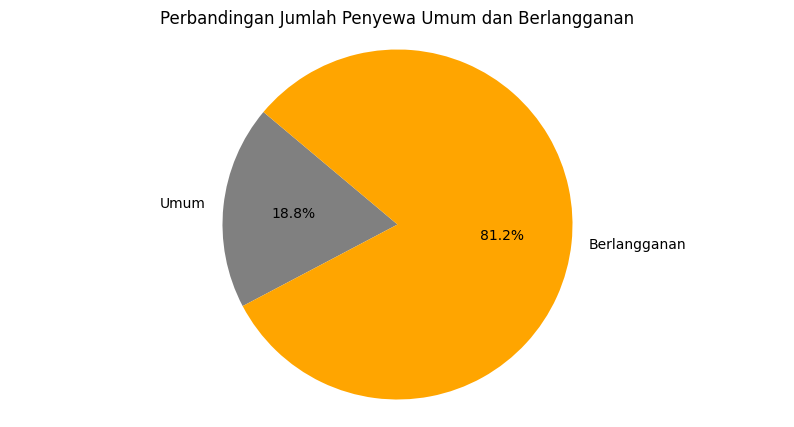

In [191]:
# memvisualisasikan data banyak penyewa umum dan teregistrasi
casual_sum = int(day_df['casual'].sum())
registered_sum = int(day_df['registered'].sum())

# data yang akan digunakan
sizes = [casual_sum, registered_sum]

# membuat chart pie untuk menampilkan data
plt.figure(figsize=(10,5))
plt.pie(sizes, labels = ['Umum', 'Berlangganan'], colors = ['gray', 'orange'], autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Perbandingan Jumlah Penyewa Umum dan Berlangganan')
plt.show()


dari visualisasi data status peminjam sepeda paling banyak pada pemimjam yang telah berlangganan dengan persentase 81.2% dan sisanya adalah peminjam umum

In [192]:
# membuat variable yang menampung jumlah data penyewa setiap bulan dan setiap tahun
monthly_rental = day_df.groupby(by = ['year', 'month_name', 'mnth']).cnt.sum().reset_index()

In [193]:
#mengurutkan data sesuai dengan tahun dan urut setiap bulan
monthly_rental = monthly_rental.sort_values(by=['year', 'mnth'])

In [194]:
print (monthly_rental)

    year month_name  mnth     cnt
4   2011    January     1   38189
3   2011   February     2   48215
7   2011      March     3   64045
0   2011      April     4   94870
8   2011        May     5  135821
6   2011       June     6  143512
5   2011       July     7  141341
1   2011     August     8  136691
11  2011  September     9  127418
10  2011    October    10  123511
9   2011   November    11  102167
2   2011   December    12   87323
16  2012    January     1   96744
15  2012   February     2  103137
19  2012      March     3  164875
12  2012      April     4  174224
20  2012        May     5  195865
18  2012       June     6  202830
17  2012       July     7  203607
13  2012     August     8  214503
23  2012  September     9  218573
22  2012    October    10  198841
21  2012   November    11  152664
14  2012   December    12  123713


In [195]:
# memisahkan data tahun 2011 dan tahun 2012
plot_2011 = monthly_rental[monthly_rental['year'] == 2011]
plot_2012 = monthly_rental[monthly_rental['year'] == 2012]

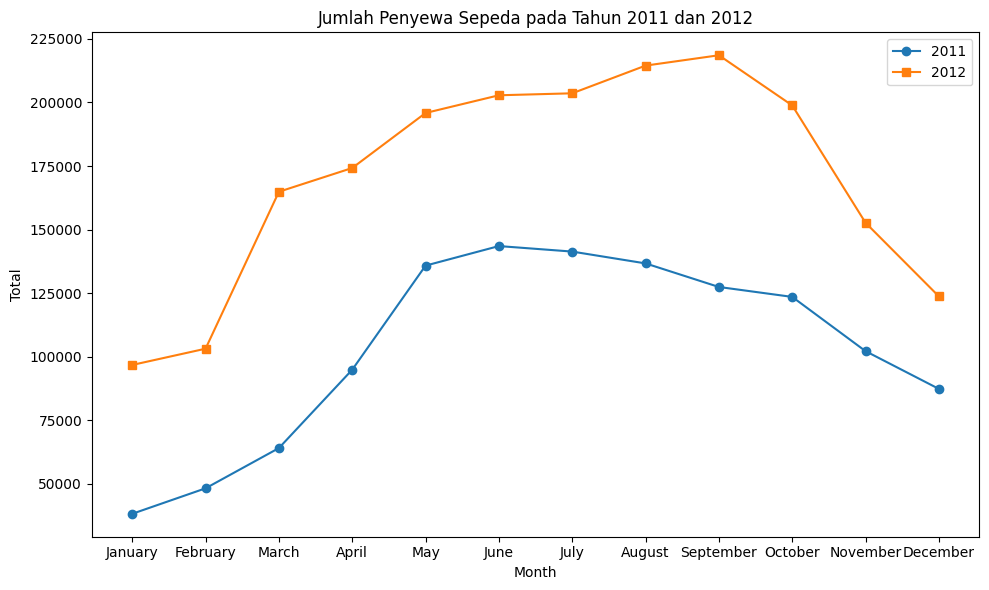

In [196]:
#mmembuat chart untuk menampilkan jumlah penyewa sepeda pada tahun 2011 dan tahun 2012
plt.figure(figsize=(10, 6))
plt.plot(plot_2011['month_name'], plot_2011['cnt'], label='2011', marker='o')
plt.plot(plot_2012['month_name'], plot_2012['cnt'], label='2012', marker='s')

# memberikan label kepada diagram yang dibuat
plt.title('Jumlah Penyewa Sepeda pada Tahun 2011 dan 2012')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Total')

# mengeatur agar setiap bagian tidak overlap dengan bangian yang lain
plt.tight_layout()
plt.show()

disimpulkan dari visualisasi data diatas kenaikan jumlah peminjam sepeda paling tinggia berada pada rentang bulan mei sampai october

visualisasi data banyak penyewa pada setiap season

In [197]:
# memuat data yang diperlukan yaitu data variable season, tahun, dan total peminjam sepeda
season_df = day_df.groupby(by = ['year', 'musim']).cnt.sum().reset_index() # pastikan untuk reset_index() karena agar variable year dapat terdistribusikan pada setiap baris dan menjadi dataframe yang utuh

In [198]:
season_df.head()

,year,musim,cnt
0,2011,dingin,326137
1,2011,gugur,419650
2,2011,panas,347316
3,2011,semi,150000
4,2012,dingin,515476


In [199]:
# memisahkan data sesuai dengan tahunnya
season_2011_df = season_df[season_df['year'] == 2011]
season_2012_df = season_df[season_df['year'] == 2012]

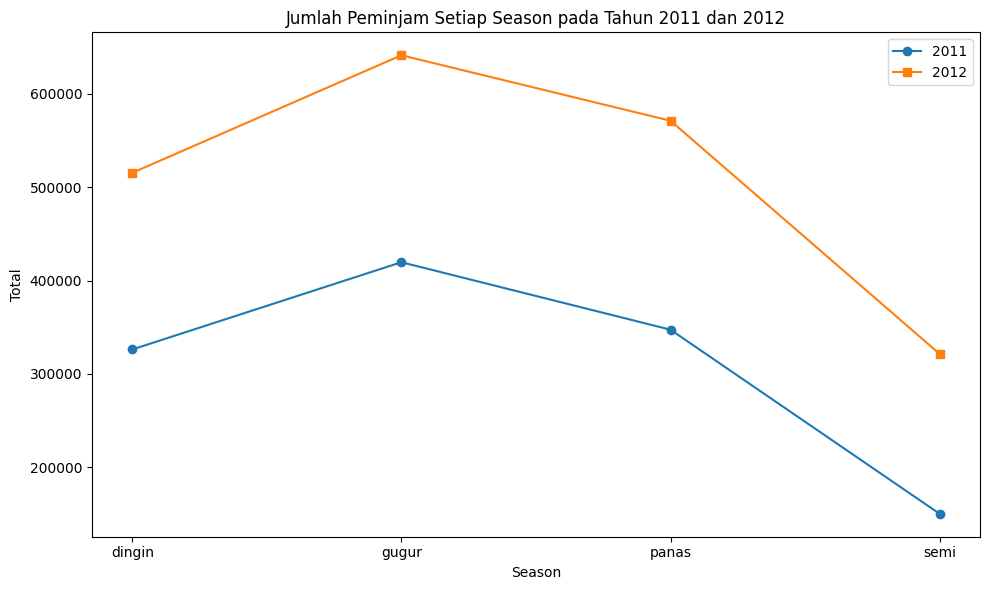

In [200]:
#membuat chart dari data peminjam setiap season tersebut
plt.figure(figsize=(10,6))
plt.plot(season_2011_df['musim'], season_2011_df['cnt'], label='2011', marker='o')
plt.plot(season_2012_df['musim'], season_2012_df['cnt'], label='2012', marker='s')

#membarikan balbel pada chart yang dibuat 
plt.title('Jumlah Peminjam Setiap Season pada Tahun 2011 dan 2012')
plt.xlabel('Season')
plt.ylabel('Total')
plt.legend()

# mengatur agar tulisan atau elemen lain tidak overlap dengan elemen yang lain
plt.tight_layout()
plt.show()

visualisasi data idatas juga sejalan dengan visualisasi data setiap bulan yang dimana kenaikan jumlah peminjam sepeda pada musim gugur dan panas dengan jumlah tertinggi peminjam sepeda pada tahun 2011 dan tahun 2012 terjadi pada musim gugur

menyiapkan data final

In [201]:
day_df.to_csv('final_data.csv', index=False)